In [1]:
#importing libraries
import tensorflow as tf
from tensorflow.keras import models,layers
import matplotlib.pyplot as plt
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' 


In [2]:
#specifying constants to initialize image size,batch size,channels and epoch
#p.s: An epoch is a term used in machine learning and indicates the number 
# - of passes of the entire training dataset the machine learning algorithm has completed.
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

In [3]:
#using tensorflow to load datasetand get total numbers of files
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "potatoes-dataset",
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
    
)

Found 2152 files belonging to 3 classes.


In [4]:
# saving folder names into class names
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
#getting the length of the dataset(every element in the dataset is a batch of 32 images)
len(dataset)

68

In [6]:
# testing the concept of the len (32=batch,256=img size,3=rgb channels)
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 256, 256, 3)
[1 0 2 0 1 0 1 0 0 1 1 2 1 0 1 0 0 1 0 1 1 1 0 0 0 1 0 2 1 0 1 0]


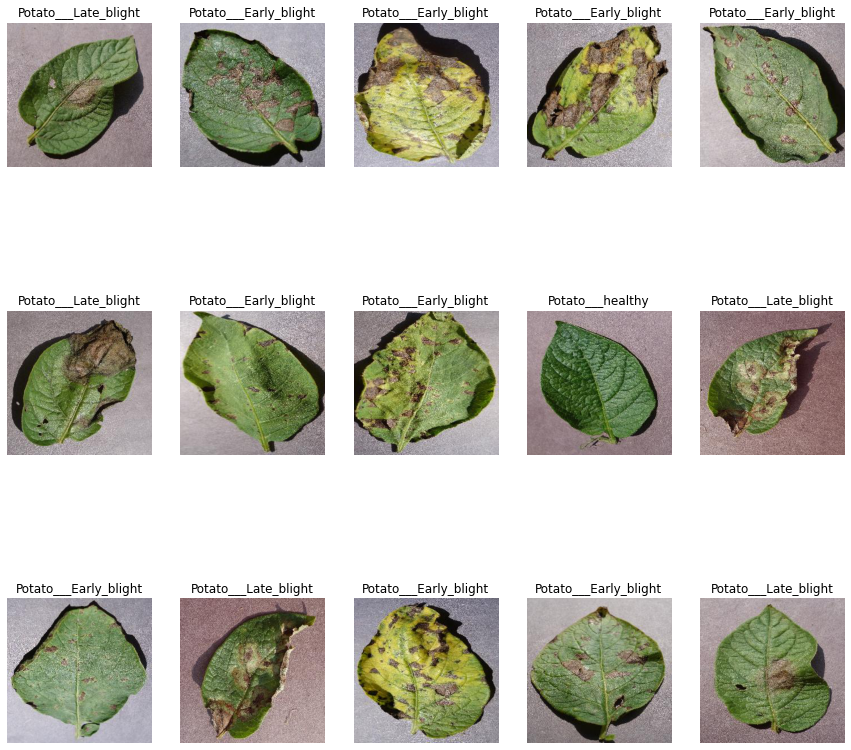

In [9]:
#visualise sample images
plt.figure(figsize=(15,15))
for image_batch, label_batch in dataset.take(1):
    for i in range(15):
        ax = plt.subplot(3,5,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")


In [ ]:
#splitting dataset into training, validation and test datasets
80% ==> training dataset
10% ==> validation dataset
10% ==> test dataset

In [12]:
#creating a function for dataset partitioning from tensorflow
def get_dataset_partitions_tf(ds, train_split = 0.8, val_split = 0.1, test_split = 0.1,shuffle = True, shuffle_size = 10000):
    ds_size = len(ds)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)
    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [13]:
#calling the above created function and storing them in variables
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [14]:
#getting the length of the train_ds
len(train_ds)

54

In [17]:
#getting the length of the test_ds
len(val_ds)

6

In [18]:
#getting the length of the val_ds
len(test_ds)

8

In [19]:
#caching(read the image from the disk and then so that it'd produce the same 
#image when needed for the next iteration by keeping the image in memory) in order to improve pipeline performance

#performing a train_ds cache--optimize
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)


In [20]:
#preprocessing pipeline by creating resizing and rescaling layers
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)

])

In [21]:
#preprocessing pipeline by creating data augmentation layers
daya_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)

])

In [ ]:
#convolutional neural network